In [52]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, GaussianNoise
from tensorflow.keras import Model, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Data load

In [53]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/housing.csv'
df = pd.read_csv(url, delim_whitespace=True,header=None)

### Data shuffling and sampling

In [54]:
df = df.sample(frac=1.0,random_state=2)
dataset = df.values
X = dataset[:, :13]
Y = dataset[:, 13]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)


### Model structure: Basline model

In [55]:
def HouseModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='linear')(Hidden3)

    return Model(Inp, Output)


### Experiment setting

In [56]:
Npatience = 50
Nepochs = 300
Nbatch = 20

### Model save directory setting

In [57]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model training

In [ ]:
ModelSaveSameName = save_path+'HouseM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)
EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience)


House = HouseModel()
House.compile(loss=tf.losses.mse, optimizer='adam')

HistHouse = House.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs, batch_size=Nbatch,  verbose=1, callbacks=[ModelSave, EarlyStop])

### Plot loss graphs

Text(0, 0.5, 'loss')

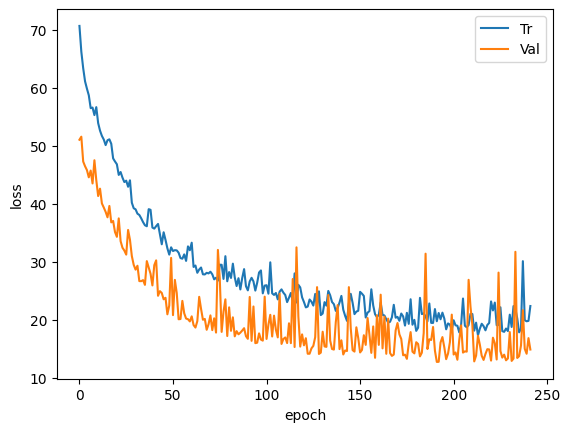

In [59]:
StartIDX = 5
plt.plot(HistHouse.history['loss'][StartIDX:], label='Tr')
plt.plot(HistHouse.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Competition model

In [47]:
'''Please complete the code below
L1L2 = regularizers.L1L2(l1=x.xx, l2=x.xx)
Drate = x.xx
Std = x.xx
'''

def HouseCompModel ():
    
    'Please complete the code to define your model here'

    return Model(Inp, Output)

### Model training

In [ ]:
ModelSaveSameName = save_path+'HouseComp.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

EarlyStop = EarlyStopping(monitor='val_loss', patience=Npatience )

HouseComp = HouseCompModel()
HouseComp.compile(loss=tf.losses.mse, optimizer='adam')

HistHouseComp = HouseComp.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=Nepochs , batch_size=Nbatch ,  verbose=1, callbacks=[ModelSave, EarlyStop])

### Plot loss graphs

Text(0, 0.5, 'loss')

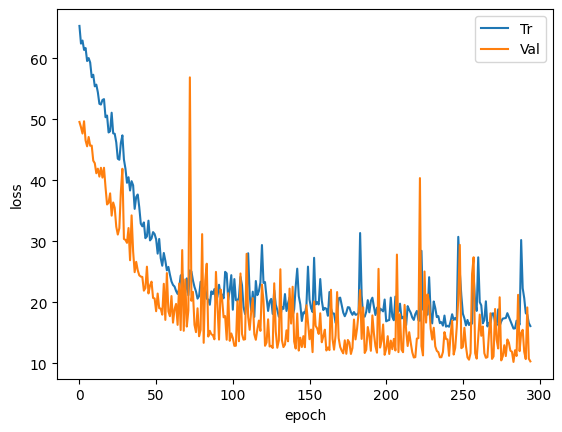

In [49]:
StartIDX = 5
plt.plot(HistHouseComp.history['loss'][StartIDX:], label='Tr')
plt.plot(HistHouseComp.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Plot true and predicted values and a linear regression model fit.¶

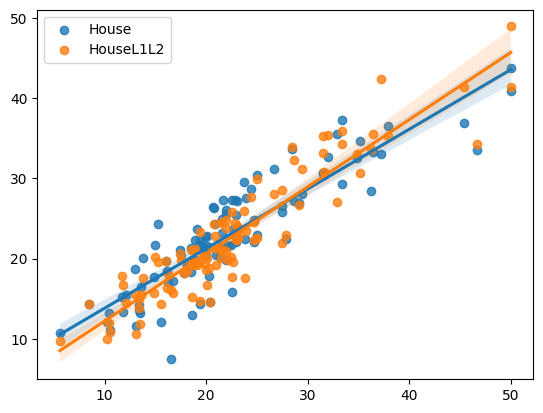

In [50]:
PredHouse =  House.predict(X_test, batch_size=100)
PredHouseL1L2 = HouseComp.predict(X_test, batch_size=100)

sns.regplot(x=Y_test, y=PredHouse, label='House')
sns.regplot(x=Y_test, y=PredHouseL1L2, label='HouseL1L2')
plt.legend()

### Comparison MSEs between base and competition models

In [51]:
House.evaluate(X_test, Y_test), HouseComp.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 10.2937


(15.67137336730957, 10.293679237365723)